In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

2113536/2110848 [==============================] - 0s 0us/step
(1395,) (1395,) (599,) (599,)


D:\Program Files\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Program Files\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# post : 50개의 단어가 되지 않은 sequence는 뒤쪽을 0으로 채움. 이걸 붙이지 않으면 앞쪽으로 0이 채워짐. 
X_train = pad_sequences(X_train, padding="post")
X_test = pad_sequences(X_train, padding="post")
print(X_train.shape, X_test.shape)

(1395, 49) (1395, 49)


In [7]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, X_test.shape)

(1395, 49, 1) (1395, 49, 1)


In [9]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
print(y_data.shape)

(1994, 46)


In [23]:
y_train = y_data[:1395]
y_test = y_data[:1395]
print(y_train.shape, y_test.shape)

(1395, 46) (1395, 46)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [14]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(49, 1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
    
    return model

In [15]:
model = vanilla_rnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2346      
_________________________________________________________________
activation (Activation)      (None, 46)                0         
Total params: 4,946
Trainable params: 4,946
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 28ms/step - loss: 2.8168 - accuracy: 0.5565 - val_loss: 1.7312 - val_accuracy: 0.7240
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 1.4800 - accuracy: 0.7124 - val_loss: 1.2272 - val_accuracy: 0.7240
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 1.2457 - accuracy: 0.7124 - val_loss: 1.1409 - val_accuracy: 0.7240
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 1.1987 - accuracy: 0.7124 - val_loss: 1.1199 - val_accuracy: 0.7240
Epoch 5/100
23/23 [==============================] - 0s 11ms/step - loss: 1.1863 - accuracy: 0.7124 - val_loss: 1.1138 - val_accuracy: 0.7240
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 1.1785 - accuracy: 0.7124 - val_loss: 1.1080 - val_accuracy: 0.7240
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 1.1744 - accuracy: 0.7124 - val_loss: 1.1057 - val_accuracy: 0.7240
Epoch 

23/23 [==============================] - 0s 8ms/step - loss: 1.0301 - accuracy: 0.7124 - val_loss: 1.0212 - val_accuracy: 0.7276
Epoch 59/100
23/23 [==============================] - 0s 10ms/step - loss: 0.9970 - accuracy: 0.7249 - val_loss: 1.0257 - val_accuracy: 0.7348
Epoch 60/100
23/23 [==============================] - 0s 9ms/step - loss: 0.9899 - accuracy: 0.7222 - val_loss: 1.0464 - val_accuracy: 0.6953
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.9889 - accuracy: 0.7142 - val_loss: 1.0319 - val_accuracy: 0.7204
Epoch 62/100
23/23 [==============================] - 0s 10ms/step - loss: 0.9855 - accuracy: 0.7258 - val_loss: 1.0477 - val_accuracy: 0.7168
Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 1.0269 - accuracy: 0.7052 - val_loss: 1.0612 - val_accuracy: 0.7419
Epoch 64/100
23/23 [==============================] - 0s 9ms/step - loss: 1.0250 - accuracy: 0.7213 - val_loss: 1.0220 - val_accuracy: 0.7276
Epoch 65/100
23/2

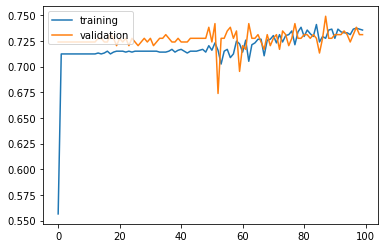

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [24]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

44/44 [==============================] - 0s 3ms/step - loss: 0.9355 - accuracy: 0.7283
Test accuracy:  0.7283154129981995
